There are many methods to detect the outliers. Among all, I will implement two of the most popular techniques. 1st z-score method and 2nd IQR method. This notebook will disuss the IQR method. <br> <br>
Before implementing the IQR method, we must know the concept of percentile and quartile. We have to calculate (1st quartile/ 25th percentile and 3rd quartile/ 75th percentile). After calculating these, we have to get the value of IQR. IQR = Q3-Q1. Then we have to calculate upper value and lower value. Below, I have show the steps clearly.
<br> 
IQR is preferred when the distribution of the data is skewed. If it's normal distribution, we can do z-score method to detect the outlier. Kindly check HandlingOutlier_usingZscore ipynb file inside the same repo. <br> <br>
After we detect the outliers, its all about whether to trim the data or to cap the data. Trim will drop all those outliers whereas cap will replace the outliers with the capped value (minumum and maximum of the data distribution)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as m

In [2]:
data = pd.read_csv('D:/datasets/placement_data.csv')
data.shape

(1000, 3)

In [3]:
data.head(1)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1


In [4]:
data['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

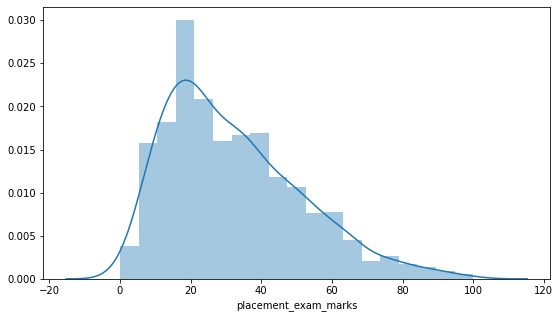

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(data['placement_exam_marks'])

We can see the column 'placement_exam_marks' is positively skewed.

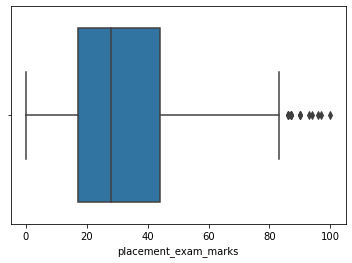

In [6]:
sns.boxplot(data['placement_exam_marks'])

Visualizing the outliers using boxplot.

In [7]:
first_quartile = data['placement_exam_marks'].quantile(0.25)
third_quartile = data['placement_exam_marks'].quantile(0.75)
print(first_quartile, third_quartile)

17.0 44.0


In [8]:
iqr = third_quartile - first_quartile
iqr

27.0

In [9]:
upper = third_quartile + (1.5*iqr)
lower = first_quartile - (1.5*iqr)

In [10]:
print(upper)
print(lower)

84.5
-23.5


In [11]:
#triming and droping
#all the outlier data.
data[(data['placement_exam_marks']<lower) | (data['placement_exam_marks']>upper)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [12]:
new_data = data[(data['placement_exam_marks']>lower) & (data['placement_exam_marks']<upper)]
new_data.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


In [13]:
new_data.shape

(985, 3)

In [14]:
#capping
data['placement_exam_marks'] = np.where(data['placement_exam_marks']>upper, upper,
                                        np.where(data['placement_exam_marks']<lower, lower, data['placement_exam_marks'] ))

In [15]:
data.shape

(1000, 3)

In [16]:
data['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

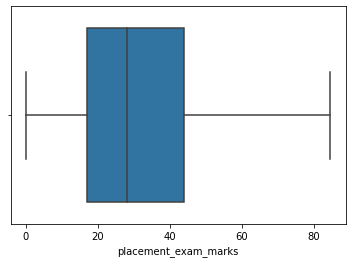

In [17]:
sns.boxplot(data['placement_exam_marks'])